# Source of The Dataset
* Own dataset

In [1]:
# loadin important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read the dataset 

df = pd.read_csv('Depression.csv')
print(df.shape)
df.head()

(758, 35)


,mood,age,gender,subject,semester,sibilings,living,employment,personality,relationship,...,meditation,video games,study hours,phone hours,medication,movies per week,music hours,depression,category,verdict
0,Tensed,24,Female,Engineering,9,3,With family,Part time,Extrovert,In a relationship,...,Not at all,Not at all,2,6 to 8,No,0,0,18,Moderately Severe,Yes
1,Tensed,23,Male,Engineering,11,3,With family,None,Ambivert,Single,...,Sometimes,Sometimes,4,0 to 2,No,5,0,1,None,No
2,Sad,19,Female,Pharmacy,3,0,With family,None,Ambivert,Single,...,Not at all,Not at all,3,6 to 8,No,0,0,21,Severe,Yes
3,Lost,23,Female,Engineering,13,1,With family,None,Introvert,In a relationship,...,Not at all,Very Often,1,0 to 2,No,5,0,23,Severe,Yes
4,Lost,22,Male,Engineering,11,1,With family,None,Ambivert,Single,...,Not at all,Very Often,2,6 to 8,No,1,4,19,Moderately Severe,Yes


In [3]:
for cols in df.columns:
    unique_vals = df[cols].unique()
    if len(unique_vals) <= 10:
        print("Feature ", cols, " has ", len(unique_vals), " unique values ----> ", unique_vals)
    else:
        print("Feature ", cols, " has ", len(unique_vals), " unique values")

Feature  mood  has  5  unique values ---->  ['Tensed' 'Sad' 'Lost' 'Happy' 'Angry']
Feature  age  has  16  unique values
Feature  gender  has  3  unique values ---->  ['Female' 'Male' 'Others']
Feature  subject  has  70  unique values
Feature  semester  has  22  unique values
Feature  sibilings  has  13  unique values
Feature  living  has  2  unique values ---->  ['With family' 'Without family']
Feature  employment  has  3  unique values ---->  ['Part time' 'None' 'Full time']
Feature  personality  has  3  unique values ---->  ['Extrovert' 'Ambivert' 'Introvert']
Feature  relationship  has  5  unique values ---->  ['In a relationship' 'Single' 'Engaged' 'Divorced' 'Married']
Feature  wakeup  has  76  unique values
Feature  breakfast  has  71  unique values
Feature  launch  has  58  unique values
Feature  dinner  has  27  unique values
Feature  sleep  has  65  unique values
Feature  hobbies  has  187  unique values
Feature  smoker  has  2  unique values ---->  ['No' 'Yes']
Feature  alch

# Data Visualization

<AxesSubplot:xlabel='depression', ylabel='Proportion'>

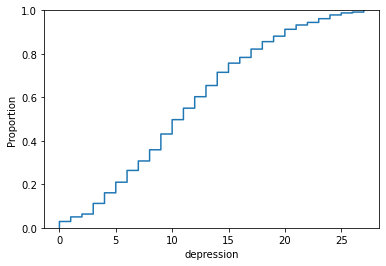

In [4]:
sns.ecdfplot(x = 'depression', data = df)

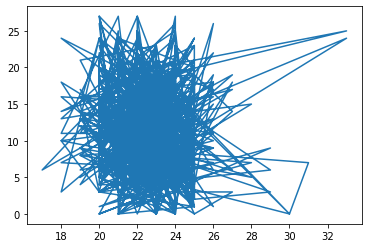

In [5]:
x = df['age']
y = df['depression']
plt.plot(x, y)

<AxesSubplot:xlabel='gender', ylabel='depression'>

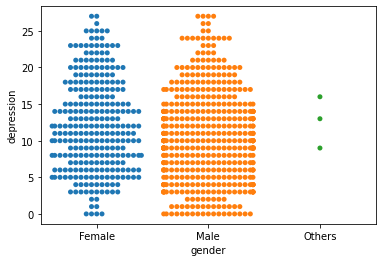

In [6]:
sns.swarmplot(y = 'depression', x = 'gender', data = df)

<AxesSubplot:xlabel='gender', ylabel='depression'>

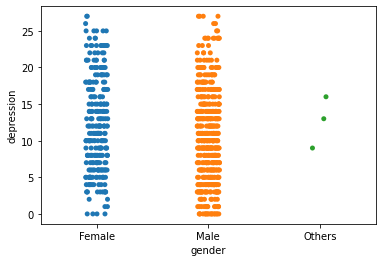

In [7]:
sns.stripplot(y = 'depression', x = 'gender', data = df)

<AxesSubplot:xlabel='depression', ylabel='Proportion'>

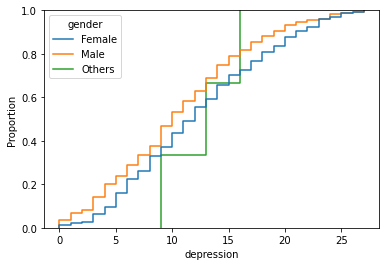

In [8]:
sns.ecdfplot(x = 'depression', data = df, hue = 'gender')

<AxesSubplot:xlabel='depression', ylabel='Count'>

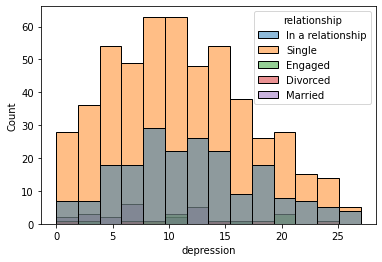

In [9]:
sns.histplot(x = 'depression', data = df, hue = 'relationship')

<AxesSubplot:xlabel='depression', ylabel='age'>

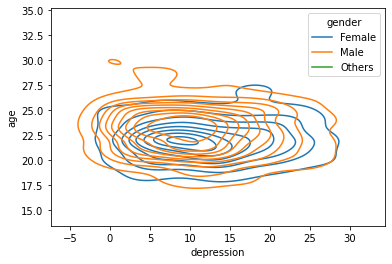

In [10]:
sns.kdeplot(x = 'depression', y = 'age', hue = 'gender', data = df)

In [11]:
import collections

a = df['category']
counter = collections.Counter(a)
print(counter)
values = counter.values()
print(values)
keys = counter.keys()
print(keys)
print(counter.most_common(3))
print(dict(counter))

Counter({'Moderate': 215, 'Mild': 205, 'Moderately Severe': 126, 'None': 122, 'Severe': 90})
dict_values([126, 122, 90, 215, 205])
dict_keys(['Moderately Severe', 'None', 'Severe', 'Moderate', 'Mild'])
[('Moderate', 215), ('Mild', 205), ('Moderately Severe', 126)]
{'Moderately Severe': 126, 'None': 122, 'Severe': 90, 'Moderate': 215, 'Mild': 205}


([<matplotlib.patches.Wedge at 0x1ed27c508e0>,
 [Text(0.9533868822548479, 0.5486833811447008, 'Moderately Severe'),
  Text(0.02279358610591973, 1.099763816659028, 'None'),
  Text(-0.8321382334339209, 0.7194066725138666, 'Severe'),
  Text(-0.9370694660790571, -0.5761083368102836, 'Moderate'),
  Text(0.7262795594920571, -0.8261464770027308, 'Mild')],
 [Text(0.5200292085026442, 0.29928184426074583, '16.6%'),
  Text(0.012432865148683489, 0.5998711727231062, '16.1%'),
  Text(-0.45389358187304774, 0.3924036395530181, '11.9%'),
  Text(-0.5111287996794855, -0.3142409109874274, '28.4%'),
  Text(0.39615248699566746, -0.45062535109239854, '27.0%')])

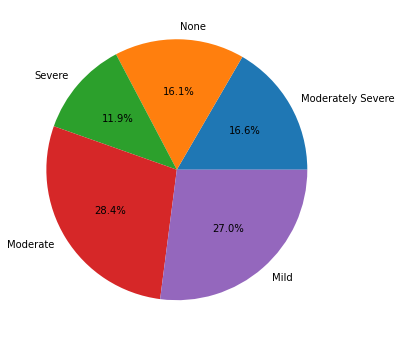

In [12]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.pie(values, labels=keys, autopct='%1.1f%%')

# Data Pre-Processing Phase

In [13]:
# checing for null values
df.isnull().sum()

mood               0
age                0
gender             0
subject            0
semester           0
sibilings          0
living             0
employment         0
personality        0
relationship       0
wakeup             0
breakfast          0
launch             0
dinner             0
sleep              0
hobbies            0
smoker             0
alcholic           0
drug addicted      0
friends            0
hangout            0
social events      0
pray               0
sports             0
exercise           0
meditation         0
video games        0
study hours        0
phone hours        0
medication         2
movies per week    0
music hours        0
depression         0
category           0
verdict            0
dtype: int64

In [14]:
# remove null entries
df.dropna(inplace = True)

# remove duplicate entries, if any
df.drop_duplicates(inplace = True)

print(df.shape)

(756, 35)


In [15]:
df.describe()

,age,semester,sibilings,friends,study hours,music hours,depression
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,22.543651,7.947090,1.746032,3.776455,2.792328,1.723545,11.177249
std,2.006466,4.809191,1.421331,5.067651,2.201864,1.871084,6.307385
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,5.000000,1.000000,2.000000,1.000000,1.000000,6.000000
50%,22.000000,8.000000,1.000000,3.000000,2.000000,1.000000,11.000000
75%,24.000000,11.000000,2.000000,5.000000,4.000000,2.000000,15.000000
max,33.000000,83.000000,20.000000,100.000000,10.000000,10.000000,27.000000


In [16]:
# observe dataset and check for outliers
for cols in df.columns:
    print(str(df[cols].value_counts()) + '\n')

Happy     286
Tensed    186
Lost      156
Sad       108
Angry      20
Name: mood, dtype: int64

22    144
23    143
21    133
24    115
25     81
20     74
19     21
26     17
18     10
27      6
28      3
29      3
30      2
33      2
17      1
31      1
Name: age, dtype: int64

Male      475
Female    278
Others      3
Name: gender, dtype: int64

Engineering                               384
Business                                  206
Pharmacy                                   28
MBBS                                       16
Law                                        15
                                         ... 
Social work                                 1
English Linguistics                         1
 ?????????????? ????? ???????????           1
ESM                                         1
Genetic Engineering and Biotechnology       1
Name: subject, Length: 70, dtype: int64

5     108
11     95
12     85
8      68
10     56
1      48
4      47
7      40
2      39
9      38
6 

In [17]:
# settin limits for features
limit = {
    'age': 27,
    'semester': 17,
    'sibilings': 6,
    'friends': 15,
}

# drop rows where limit exceed for features
for feature in limit:
    index = df.index[df[feature] > limit[feature]].tolist()
    df.drop(index = index, inplace = True)
    
print(df.shape)

(732, 35)


In [18]:
# Convert Catergorical values to numeric representation
df['pray'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
df['sports'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
df['hangout'].replace({'Not at all':0, 'Sometimes':1, 'Often':2, 'Very Often':3}, inplace = True)
df['exercise'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
df['meditation'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
df['video games'].replace({'Not at all':0, 'Sometimes':1, 'Often':2, 'Very Often':3}, inplace = True)
df['social events'].replace({'Not at all':0, 'Sometimes':1, 'Often':2, 'Very Often':3}, inplace = True)
df['phone hours'].replace({'0 to 2': 0, '3 to 5': 1, '6 to 8':2, 'more than 8':3}, inplace = True)
df.head()

,mood,age,gender,subject,semester,sibilings,living,employment,personality,relationship,...,meditation,video games,study hours,phone hours,medication,movies per week,music hours,depression,category,verdict
0,Tensed,24,Female,Engineering,9,3,With family,Part time,Extrovert,In a relationship,...,0,0,2,2,No,0,0,18,Moderately Severe,Yes
1,Tensed,23,Male,Engineering,11,3,With family,None,Ambivert,Single,...,1,1,4,0,No,5,0,1,None,No
2,Sad,19,Female,Pharmacy,3,0,With family,None,Ambivert,Single,...,0,0,3,2,No,0,0,21,Severe,Yes
3,Lost,23,Female,Engineering,13,1,With family,None,Introvert,In a relationship,...,0,3,1,0,No,5,0,23,Severe,Yes
4,Lost,22,Male,Engineering,11,1,With family,None,Ambivert,Single,...,0,3,2,2,No,1,4,19,Moderately Severe,Yes


In [19]:
# selecting categorical features where unique values <= 6
cat_features = []
for cols in df.columns:
    unique_vals = df[cols].unique()
    if df[cols].dtype != np.int64 and len(unique_vals) <= 6:
        cat_features.append(cols)

cat_features.remove('category')  # category is the target column
cat_features.remove('verdict')  # dummy value
# cat_features.append('subject')
cat_features

['mood',
 'gender',
 'living',
 'employment',
 'personality',
 'relationship',
 'smoker',
 'alcholic',
 'drug addicted',
 'medication']

In [20]:
# convert categorical values to numeric representation
df = pd.get_dummies(data = df, columns = cat_features)
df.head()

,age,subject,semester,sibilings,wakeup,breakfast,launch,dinner,sleep,hobbies,...,relationship_Married,relationship_Single,smoker_No,smoker_Yes,alcholic_No,alcholic_Yes,drug addicted_No,drug addicted_Yes,medication_No,medication_Yes
0,24,Engineering,9,3,11:20:00 AM,1:10:00 AM,4:20:00 PM,9:20:00 PM,4:20:00 AM,Sleeping,...,0,0,1,0,1,0,1,0,1,0
1,23,Engineering,11,3,12:00:00 PM,12:15:00 PM,4:30:00 PM,10:30:00 PM,4:00:00 AM,Traveling,...,0,1,0,1,1,0,1,0,1,0
2,19,Pharmacy,3,0,8:30:00 AM,10:00:00 AM,3:00:00 PM,10:00:00 PM,1:00:00 AM,"Music, Painting",...,0,1,1,0,1,0,1,0,1,0
3,23,Engineering,13,1,2:00:00 PM,3:00:00 PM,7:00:00 PM,12:00:00 AM,3:00:00 AM,"Music, Programming",...,0,0,1,0,1,0,1,0,1,0
4,22,Engineering,11,1,11:00:00 AM,11:30:00 AM,3:00:00 PM,11:30:00 PM,3:30:00 AM,Music,...,0,1,0,1,1,0,1,0,1,0


In [21]:
df.describe()

,age,semester,sibilings,friends,hangout,social events,pray,sports,exercise,meditation,...,relationship_Married,relationship_Single,smoker_No,smoker_Yes,alcholic_No,alcholic_Yes,drug addicted_No,drug addicted_Yes,medication_No,medication_Yes
count,732.000000,732.00000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,...,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,22.423497,7.79918,1.653005,3.505464,1.375683,1.147541,1.254098,0.468579,0.769126,0.247268,...,0.027322,0.696721,0.737705,0.262295,0.911202,0.088798,0.975410,0.024590,0.857923,0.142077
std,1.791726,3.82902,1.023569,2.733733,0.838283,0.861127,0.632821,0.573321,0.651193,0.476886,...,0.163133,0.459989,0.440183,0.440183,0.284646,0.284646,0.154978,0.154978,0.349367,0.349367
min,17.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,5.00000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,22.000000,8.00000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,24.000000,11.00000,2.000000,5.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,27.000000,17.00000,6.000000,15.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Binary Prediction

# Feature Scaling

In [22]:
# decide what to do with subjec, time columns, hobbies, and movies per week
x = df.drop(columns = ['subject', 'wakeup', 'breakfast', 'launch', 'dinner', 'sleep', 'hobbies', 'movies per week', 'depression', 'category', 'verdict', ]) # X contains the features 
y = df['verdict']
print(x.shape)
x.head()

(732, 43)


,age,semester,sibilings,friends,hangout,social events,pray,sports,exercise,meditation,...,relationship_Married,relationship_Single,smoker_No,smoker_Yes,alcholic_No,alcholic_Yes,drug addicted_No,drug addicted_Yes,medication_No,medication_Yes
0,24,9,3,2,1,3,2,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,23,11,3,4,2,1,2,1,2,1,...,0,1,0,1,1,0,1,0,1,0
2,19,3,0,4,1,1,2,0,1,0,...,0,1,1,0,1,0,1,0,1,0
3,23,13,1,1,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
4,22,11,1,5,1,1,1,1,1,0,...,0,1,0,1,1,0,1,0,1,0


In [23]:
x.describe()

,age,semester,sibilings,friends,hangout,social events,pray,sports,exercise,meditation,...,relationship_Married,relationship_Single,smoker_No,smoker_Yes,alcholic_No,alcholic_Yes,drug addicted_No,drug addicted_Yes,medication_No,medication_Yes
count,732.000000,732.00000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,...,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,22.423497,7.79918,1.653005,3.505464,1.375683,1.147541,1.254098,0.468579,0.769126,0.247268,...,0.027322,0.696721,0.737705,0.262295,0.911202,0.088798,0.975410,0.024590,0.857923,0.142077
std,1.791726,3.82902,1.023569,2.733733,0.838283,0.861127,0.632821,0.573321,0.651193,0.476886,...,0.163133,0.459989,0.440183,0.440183,0.284646,0.284646,0.154978,0.154978,0.349367,0.349367
min,17.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,5.00000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,22.000000,8.00000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,24.000000,11.00000,2.000000,5.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,27.000000,17.00000,6.000000,15.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
scale_vars = []
for cols in x.columns:
    if x[cols].dtype == np.int64 and x[cols].max() > 1:
        scale_vars.append(cols)
scale_vars

['age',
 'semester',
 'sibilings',
 'friends',
 'hangout',
 'social events',
 'pray',
 'sports',
 'exercise',
 'meditation',
 'video games',
 'study hours',
 'phone hours',
 'music hours']

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 20)
print(x_train.shape)
print(x_test.shape)

(622, 43)
(110, 43)


In [26]:
# using min_max scaler to scale features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train[scale_vars])  # Why x_train fit here?
x_train[scale_vars] = scaler.transform(x_train[scale_vars])
x_test[scale_vars] = scaler.transform(x_test[scale_vars])

In [27]:
x_train.head()

,age,semester,sibilings,friends,hangout,social events,pray,sports,exercise,meditation,...,relationship_Married,relationship_Single,smoker_No,smoker_Yes,alcholic_No,alcholic_Yes,drug addicted_No,drug addicted_Yes,medication_No,medication_Yes
412,0.4,0.2500,0.166667,0.200000,0.000000,0.000000,1.0,0.0,0.5,0.0,...,0,1,1,0,1,0,1,0,1,0
31,0.5,0.3125,0.166667,0.200000,0.666667,0.333333,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,1,0,1,0
624,0.4,0.2500,0.166667,0.066667,0.000000,0.666667,0.5,0.0,0.0,0.0,...,0,0,1,0,1,0,1,0,1,0
730,0.6,0.4375,0.166667,0.133333,0.333333,0.666667,1.0,0.0,0.0,0.0,...,0,1,1,0,1,0,1,0,1,0
387,0.5,0.6250,0.500000,0.133333,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,1,0,1,0


In [28]:
x_test.head()

,age,semester,sibilings,friends,hangout,social events,pray,sports,exercise,meditation,...,relationship_Married,relationship_Single,smoker_No,smoker_Yes,alcholic_No,alcholic_Yes,drug addicted_No,drug addicted_Yes,medication_No,medication_Yes
293,0.7,0.3750,0.333333,0.000000,0.333333,0.333333,0.5,0.0,0.5,0.5,...,0,0,0,1,1,0,1,0,0,1
469,0.5,0.1875,0.000000,0.666667,0.333333,0.666667,1.0,0.0,0.5,0.0,...,0,0,1,0,1,0,1,0,0,1
276,0.1,0.0000,0.333333,0.666667,0.666667,0.333333,1.0,0.5,0.5,0.5,...,0,0,1,0,1,0,1,0,1,0
279,0.8,0.0000,0.333333,0.066667,0.000000,0.000000,0.0,0.0,0.0,0.5,...,0,0,1,0,1,0,1,0,1,0
124,0.4,0.6250,0.166667,0.333333,1.000000,0.333333,0.0,0.5,0.5,0.0,...,0,1,0,1,0,1,1,0,1,0


# Feature Selection

In [29]:
featuresWithZeroVariance = []
for cols in x_train.columns:
    unique_vals = x_train[cols].unique()
    if len(unique_vals) == 1:
        featuresWithZeroVariance.append(cols)
featuresWithZeroVariance

[]

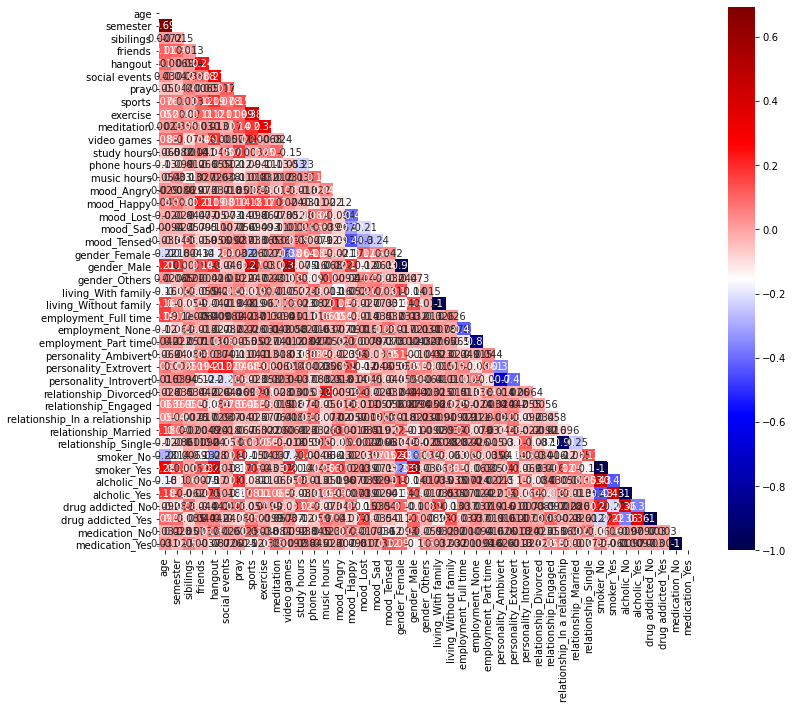

In [30]:
# Pearson's Correlation Coefficient

corr = x_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [31]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [32]:
corr_features = correlation(x_train, 0.87) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

7
{'smoker_Yes', 'gender_Male', 'drug addicted_Yes', 'alcholic_Yes', 'living_Without family', 'relationship_Single', 'medication_Yes'}


In [33]:
x_train = x_train.drop(columns = corr_features)
x_test = x_test.drop(columns = corr_features)

print(x_train.shape)
print(x_test.shape)

(622, 36)
(110, 36)


# Model Creation and Evaluation(Binary Prediction)

In [34]:
# ZeroR classifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
clf = DummyClassifier(strategy = "most_frequent")
clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.8392282958199357
Test Accuracy:  0.8454545454545455


Depth =  2 , Training Accuracy =  0.8440514469453376 , Test Accuracy =  0.8545454545454545 , Diff =  1.0494007600116873  %
Depth =  3 , Training Accuracy =  0.8585209003215434 , Test Accuracy =  0.8454545454545455 , Diff =  1.306635486699792  %
Depth =  4 , Training Accuracy =  0.8697749196141479 , Test Accuracy =  0.7727272727272727 , Diff =  9.704764688687517  %
Depth =  5 , Training Accuracy =  0.8971061093247589 , Test Accuracy =  0.8181818181818182 , Diff =  7.892429114294064  %
Depth =  6 , Training Accuracy =  0.909967845659164 , Test Accuracy =  0.8 , Diff =  10.996784565916396  %
Depth =  7 , Training Accuracy =  0.9372990353697749 , Test Accuracy =  0.7636363636363637 , Diff =  17.36626717334112  %
Depth =  8 , Training Accuracy =  0.9501607717041801 , Test Accuracy =  0.7727272727272727 , Diff =  17.74334989769074  %
Depth =  9 , Training Accuracy =  0.9694533762057878 , Test Accuracy =  0.7909090909090909 , Diff =  17.854428529669686  %
Depth =  10 , Training Accuracy =  0.

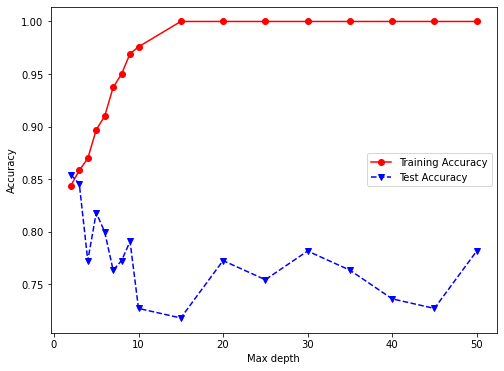

In [35]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(x_train, y_train)
    y_predTrain = clf.predict(x_train)
    y_predTest = clf.predict(x_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.8272727272727273 , Difference =  17.272727272727273 %
K =  5 , Training Accuracy =  0.8681672025723473  Test Accuracy =  0.8181818181818182 , Difference =  4.998538439052902 %
K =  10 , Training Accuracy =  0.8392282958199357  Test Accuracy =  0.8454545454545455 , Difference =  0.6226249634609715 %
K =  15 , Training Accuracy =  0.837620578778135  Test Accuracy =  0.8454545454545455 , Difference =  0.7833966676410453 %
K =  20 , Training Accuracy =  0.8360128617363344  Test Accuracy =  0.8363636363636363 , Difference =  0.035077462730193076 %
K =  25 , Training Accuracy =  0.8440514469453376  Test Accuracy =  0.8363636363636363 , Difference =  0.7687810581701315 %
K =  30 , Training Accuracy =  0.842443729903537  Test Accuracy =  0.8090909090909091 , Difference =  3.3352820812627915 %


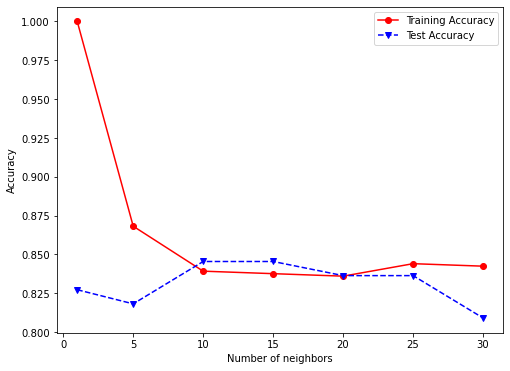

In [36]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(x_train, y_train)
    y_predTrain = clf.predict(x_train)
    y_predTest = clf.predict(x_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.8090909090909091 , Difference =  19.090909090909093 %
K =  5 , Training Accuracy =  0.864951768488746  Test Accuracy =  0.8181818181818182 , Difference =  4.676995030692776 %
K =  10 , Training Accuracy =  0.842443729903537  Test Accuracy =  0.8272727272727273 , Difference =  1.5171002630809727 %
K =  15 , Training Accuracy =  0.8440514469453376  Test Accuracy =  0.8454545454545455 , Difference =  0.1403098509207834 %
K =  20 , Training Accuracy =  0.8344051446945338  Test Accuracy =  0.8454545454545455 , Difference =  1.1049400760011707 %
K =  25 , Training Accuracy =  0.8408360128617364  Test Accuracy =  0.8363636363636363 , Difference =  0.44723764981000613 %
K =  30 , Training Accuracy =  0.8392282958199357  Test Accuracy =  0.8454545454545455 , Difference =  0.6226249634609715 %


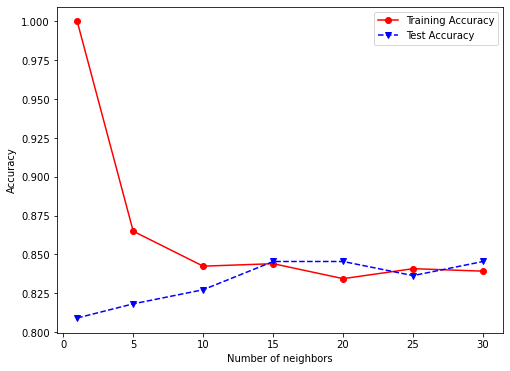

In [37]:
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(x_train, y_train)
    y_predTrain = clf.predict(x_train)
    y_predTest = clf.predict(x_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [38]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'none')

clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()

clf = LogisticRegression(penalty = 'l2')

clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Logistic Regression with no regularization
Train Accuracy:  0.8536977491961415
Test Accuracy:  0.8636363636363636

Logistic Regression with L2 regularization
Train Accuracy:  0.8520900321543409
Test Accuracy:  0.8545454545454545


In [39]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.6704180064308681
Test Accuracy:  0.7272727272727273


In [40]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.8392282958199357
Test Accuracy:  0.8363636363636363


In [41]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.8392282958199357
Test Accuracy:  0.8454545454545455


In [42]:
# for the SVC classifier
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[ 0 17]
 [ 0 93]]

Classification Report
              precision    recall  f1-score   support

          No      0.000     0.000     0.000        17
         Yes      0.845     1.000     0.916        93

    accuracy                          0.845       110
   macro avg      0.423     0.500     0.458       110
weighted avg      0.715     0.845     0.775       110



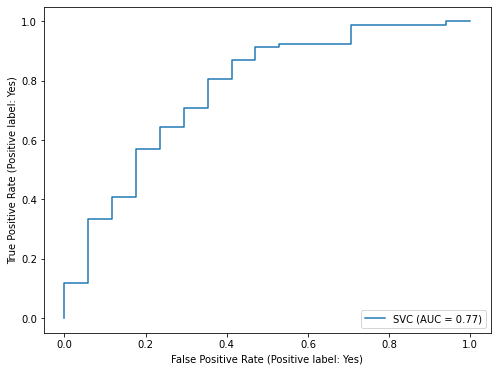

In [43]:
from sklearn.metrics import plot_roc_curve
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(x_train, y_train)
metrics.plot_roc_curve(clf, x_test, y_test);

# Depression Category Prediction

# Feature Scaling

In [44]:
# decide what to do with subjec, time columns, hobbies, and movies per week
x = df.drop(columns = ['subject', 'wakeup', 'breakfast', 'launch', 'dinner', 'sleep', 'hobbies', 'movies per week', 'depression', 'category', 'verdict', ]) # X contains the features
y = df['verdict']
print(x.shape)
x.head()

(732, 43)


,age,semester,sibilings,friends,hangout,social events,pray,sports,exercise,meditation,...,relationship_Married,relationship_Single,smoker_No,smoker_Yes,alcholic_No,alcholic_Yes,drug addicted_No,drug addicted_Yes,medication_No,medication_Yes
0,24,9,3,2,1,3,2,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,23,11,3,4,2,1,2,1,2,1,...,0,1,0,1,1,0,1,0,1,0
2,19,3,0,4,1,1,2,0,1,0,...,0,1,1,0,1,0,1,0,1,0
3,23,13,1,1,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
4,22,11,1,5,1,1,1,1,1,0,...,0,1,0,1,1,0,1,0,1,0


In [45]:
x.describe()

,age,semester,sibilings,friends,hangout,social events,pray,sports,exercise,meditation,...,relationship_Married,relationship_Single,smoker_No,smoker_Yes,alcholic_No,alcholic_Yes,drug addicted_No,drug addicted_Yes,medication_No,medication_Yes
count,732.000000,732.00000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,...,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,22.423497,7.79918,1.653005,3.505464,1.375683,1.147541,1.254098,0.468579,0.769126,0.247268,...,0.027322,0.696721,0.737705,0.262295,0.911202,0.088798,0.975410,0.024590,0.857923,0.142077
std,1.791726,3.82902,1.023569,2.733733,0.838283,0.861127,0.632821,0.573321,0.651193,0.476886,...,0.163133,0.459989,0.440183,0.440183,0.284646,0.284646,0.154978,0.154978,0.349367,0.349367
min,17.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,5.00000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,22.000000,8.00000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,24.000000,11.00000,2.000000,5.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,27.000000,17.00000,6.000000,15.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
scale_vars = []
for cols in x.columns:
    if x[cols].dtype == np.int64 and x[cols].max() > 1:
        scale_vars.append(cols)
scale_vars

['age',
 'semester',
 'sibilings',
 'friends',
 'hangout',
 'social events',
 'pray',
 'sports',
 'exercise',
 'meditation',
 'video games',
 'study hours',
 'phone hours',
 'music hours']

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 20)
print(x_train.shape)
print(x_test.shape)

(622, 43)
(110, 43)


In [48]:
# using min_max scaler to scale features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train[scale_vars])  # Why x_train fit here?
x_train[scale_vars] = scaler.transform(x_train[scale_vars])
x_test[scale_vars] = scaler.transform(x_test[scale_vars])

In [49]:
x_train.head()

,age,semester,sibilings,friends,hangout,social events,pray,sports,exercise,meditation,...,relationship_Married,relationship_Single,smoker_No,smoker_Yes,alcholic_No,alcholic_Yes,drug addicted_No,drug addicted_Yes,medication_No,medication_Yes
412,0.4,0.2500,0.166667,0.200000,0.000000,0.000000,1.0,0.0,0.5,0.0,...,0,1,1,0,1,0,1,0,1,0
31,0.5,0.3125,0.166667,0.200000,0.666667,0.333333,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,1,0,1,0
624,0.4,0.2500,0.166667,0.066667,0.000000,0.666667,0.5,0.0,0.0,0.0,...,0,0,1,0,1,0,1,0,1,0
730,0.6,0.4375,0.166667,0.133333,0.333333,0.666667,1.0,0.0,0.0,0.0,...,0,1,1,0,1,0,1,0,1,0
387,0.5,0.6250,0.500000,0.133333,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,1,0,1,0


In [50]:
x_test.head()

,age,semester,sibilings,friends,hangout,social events,pray,sports,exercise,meditation,...,relationship_Married,relationship_Single,smoker_No,smoker_Yes,alcholic_No,alcholic_Yes,drug addicted_No,drug addicted_Yes,medication_No,medication_Yes
293,0.7,0.3750,0.333333,0.000000,0.333333,0.333333,0.5,0.0,0.5,0.5,...,0,0,0,1,1,0,1,0,0,1
469,0.5,0.1875,0.000000,0.666667,0.333333,0.666667,1.0,0.0,0.5,0.0,...,0,0,1,0,1,0,1,0,0,1
276,0.1,0.0000,0.333333,0.666667,0.666667,0.333333,1.0,0.5,0.5,0.5,...,0,0,1,0,1,0,1,0,1,0
279,0.8,0.0000,0.333333,0.066667,0.000000,0.000000,0.0,0.0,0.0,0.5,...,0,0,1,0,1,0,1,0,1,0
124,0.4,0.6250,0.166667,0.333333,1.000000,0.333333,0.0,0.5,0.5,0.0,...,0,1,0,1,0,1,1,0,1,0


# Feature Selection

In [51]:
featuresWithZeroVariance = []
for cols in x_train.columns:
    unique_vals = x_train[cols].unique()
    if len(unique_vals) == 1:
        featuresWithZeroVariance.append(cols)
featuresWithZeroVariance

[]

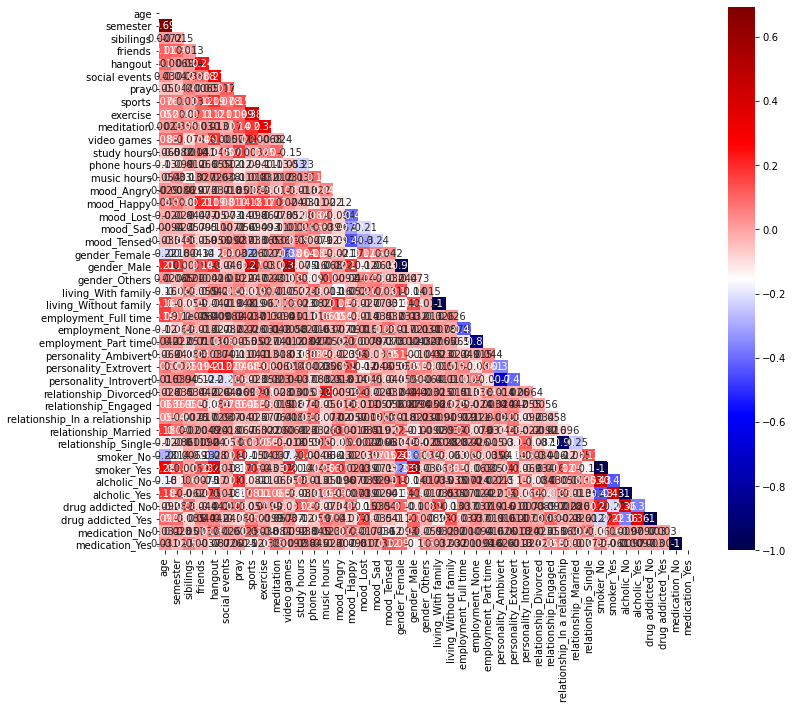

In [52]:
# Pearson's Correlation Coefficient

corr = x_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [53]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [54]:
corr_features = correlation(x_train, 0.87) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

7
{'smoker_Yes', 'gender_Male', 'drug addicted_Yes', 'alcholic_Yes', 'living_Without family', 'relationship_Single', 'medication_Yes'}


In [55]:
x_train = x_train.drop(columns = corr_features)
x_test = x_test.drop(columns = corr_features)

print(x_train.shape)
print(x_test.shape)#%% md

# Feature Scaling

(622, 36)
(110, 36)


In [56]:
# decide what to do with subjec, time columns, hobbies, and movies per week
x = df.drop(columns = ['subject', 'wakeup', 'breakfast', 'launch', 'dinner', 'sleep', 'hobbies', 'movies per week', 'depression', 'category', 'verdict', ]) # X contains the features
y = df['verdict']
print(x.shape)
x.head()

(732, 43)


,age,semester,sibilings,friends,hangout,social events,pray,sports,exercise,meditation,...,relationship_Married,relationship_Single,smoker_No,smoker_Yes,alcholic_No,alcholic_Yes,drug addicted_No,drug addicted_Yes,medication_No,medication_Yes
0,24,9,3,2,1,3,2,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,23,11,3,4,2,1,2,1,2,1,...,0,1,0,1,1,0,1,0,1,0
2,19,3,0,4,1,1,2,0,1,0,...,0,1,1,0,1,0,1,0,1,0
3,23,13,1,1,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
4,22,11,1,5,1,1,1,1,1,0,...,0,1,0,1,1,0,1,0,1,0


In [57]:
x.describe()

,age,semester,sibilings,friends,hangout,social events,pray,sports,exercise,meditation,...,relationship_Married,relationship_Single,smoker_No,smoker_Yes,alcholic_No,alcholic_Yes,drug addicted_No,drug addicted_Yes,medication_No,medication_Yes
count,732.000000,732.00000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,...,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,22.423497,7.79918,1.653005,3.505464,1.375683,1.147541,1.254098,0.468579,0.769126,0.247268,...,0.027322,0.696721,0.737705,0.262295,0.911202,0.088798,0.975410,0.024590,0.857923,0.142077
std,1.791726,3.82902,1.023569,2.733733,0.838283,0.861127,0.632821,0.573321,0.651193,0.476886,...,0.163133,0.459989,0.440183,0.440183,0.284646,0.284646,0.154978,0.154978,0.349367,0.349367
min,17.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,5.00000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,22.000000,8.00000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,24.000000,11.00000,2.000000,5.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,27.000000,17.00000,6.000000,15.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
scale_vars = []
for cols in x.columns:
    if x[cols].dtype == np.int64 and x[cols].max() > 1:
        scale_vars.append(cols)
scale_vars

['age',
 'semester',
 'sibilings',
 'friends',
 'hangout',
 'social events',
 'pray',
 'sports',
 'exercise',
 'meditation',
 'video games',
 'study hours',
 'phone hours',
 'music hours']

In [59]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 20)
print(x_train.shape)
print(x_test.shape)

(622, 43)
(110, 43)


In [60]:
# using min_max scaler to scale features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train[scale_vars])  # Why x_train fit here?
x_train[scale_vars] = scaler.transform(x_train[scale_vars])
x_test[scale_vars] = scaler.transform(x_test[scale_vars])

In [61]:
x_train.head()

,age,semester,sibilings,friends,hangout,social events,pray,sports,exercise,meditation,...,relationship_Married,relationship_Single,smoker_No,smoker_Yes,alcholic_No,alcholic_Yes,drug addicted_No,drug addicted_Yes,medication_No,medication_Yes
412,0.4,0.2500,0.166667,0.200000,0.000000,0.000000,1.0,0.0,0.5,0.0,...,0,1,1,0,1,0,1,0,1,0
31,0.5,0.3125,0.166667,0.200000,0.666667,0.333333,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,1,0,1,0
624,0.4,0.2500,0.166667,0.066667,0.000000,0.666667,0.5,0.0,0.0,0.0,...,0,0,1,0,1,0,1,0,1,0
730,0.6,0.4375,0.166667,0.133333,0.333333,0.666667,1.0,0.0,0.0,0.0,...,0,1,1,0,1,0,1,0,1,0
387,0.5,0.6250,0.500000,0.133333,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,1,0,1,0


In [62]:
x_test.head()

,age,semester,sibilings,friends,hangout,social events,pray,sports,exercise,meditation,...,relationship_Married,relationship_Single,smoker_No,smoker_Yes,alcholic_No,alcholic_Yes,drug addicted_No,drug addicted_Yes,medication_No,medication_Yes
293,0.7,0.3750,0.333333,0.000000,0.333333,0.333333,0.5,0.0,0.5,0.5,...,0,0,0,1,1,0,1,0,0,1
469,0.5,0.1875,0.000000,0.666667,0.333333,0.666667,1.0,0.0,0.5,0.0,...,0,0,1,0,1,0,1,0,0,1
276,0.1,0.0000,0.333333,0.666667,0.666667,0.333333,1.0,0.5,0.5,0.5,...,0,0,1,0,1,0,1,0,1,0
279,0.8,0.0000,0.333333,0.066667,0.000000,0.000000,0.0,0.0,0.0,0.5,...,0,0,1,0,1,0,1,0,1,0
124,0.4,0.6250,0.166667,0.333333,1.000000,0.333333,0.0,0.5,0.5,0.0,...,0,1,0,1,0,1,1,0,1,0


# Model Creation and Evaluation(Predict Specific Category)

In [63]:
# ZeroR classifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
clf = DummyClassifier(strategy = "most_frequent")
clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.8392282958199357
Test Accuracy:  0.8454545454545455


Depth =  2 , Training Accuracy =  0.8440514469453376 , Test Accuracy =  0.8545454545454545 , Diff =  1.0494007600116873  %
Depth =  3 , Training Accuracy =  0.8585209003215434 , Test Accuracy =  0.8454545454545455 , Diff =  1.306635486699792  %
Depth =  4 , Training Accuracy =  0.8697749196141479 , Test Accuracy =  0.7909090909090909 , Diff =  7.886582870505698  %
Depth =  5 , Training Accuracy =  0.8971061093247589 , Test Accuracy =  0.8181818181818182 , Diff =  7.892429114294064  %
Depth =  6 , Training Accuracy =  0.9115755627009646 , Test Accuracy =  0.8181818181818182 , Diff =  9.33937445191464  %
Depth =  7 , Training Accuracy =  0.9372990353697749 , Test Accuracy =  0.7727272727272727 , Diff =  16.45717626425022  %
Depth =  8 , Training Accuracy =  0.9501607717041801 , Test Accuracy =  0.7727272727272727 , Diff =  17.74334989769074  %
Depth =  9 , Training Accuracy =  0.9678456591639871 , Test Accuracy =  0.7363636363636363 , Diff =  23.14820228003508  %
Depth =  10 , Training A

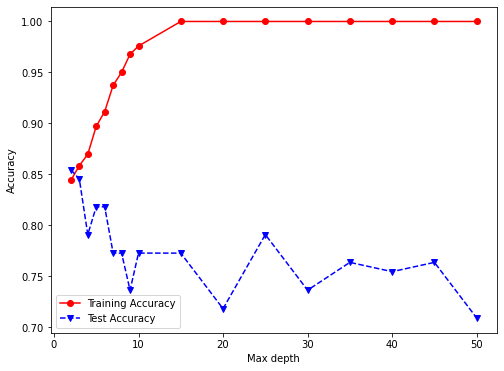

In [64]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(x_train, y_train)
    y_predTrain = clf.predict(x_train)
    y_predTest = clf.predict(x_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index],
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1


#########################################
# Plot of training and test accuracies
#########################################

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.8090909090909091 , Difference =  19.090909090909093 %
K =  5 , Training Accuracy =  0.8697749196141479  Test Accuracy =  0.8545454545454545 , Difference =  1.5229465068693382 %
K =  10 , Training Accuracy =  0.8520900321543409  Test Accuracy =  0.8090909090909091 , Difference =  4.299912306343179 %
K =  15 , Training Accuracy =  0.8456591639871383  Test Accuracy =  0.8454545454545455 , Difference =  0.020461853259279295 %
K =  20 , Training Accuracy =  0.8440514469453376  Test Accuracy =  0.8363636363636363 , Difference =  0.7687810581701315 %
K =  25 , Training Accuracy =  0.8440514469453376  Test Accuracy =  0.8181818181818182 , Difference =  2.5869628763519392 %
K =  30 , Training Accuracy =  0.8392282958199357  Test Accuracy =  0.8454545454545455 , Difference =  0.6226249634609715 %


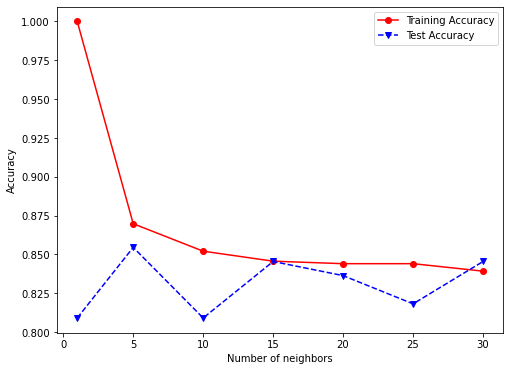

In [65]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(x_train, y_train)
    y_predTrain = clf.predict(x_train)
    y_predTest = clf.predict(x_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index],
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.7909090909090909 , Difference =  20.90909090909091 %
K =  5 , Training Accuracy =  0.864951768488746  Test Accuracy =  0.8363636363636363 , Difference =  2.858813212510969 %
K =  10 , Training Accuracy =  0.8440514469453376  Test Accuracy =  0.8090909090909091 , Difference =  3.496053785442854 %
K =  15 , Training Accuracy =  0.8456591639871383  Test Accuracy =  0.8454545454545455 , Difference =  0.020461853259279295 %
K =  20 , Training Accuracy =  0.8408360128617364  Test Accuracy =  0.8363636363636363 , Difference =  0.44723764981000613 %
K =  25 , Training Accuracy =  0.8440514469453376  Test Accuracy =  0.8363636363636363 , Difference =  0.7687810581701315 %
K =  30 , Training Accuracy =  0.8440514469453376  Test Accuracy =  0.8363636363636363 , Difference =  0.7687810581701315 %


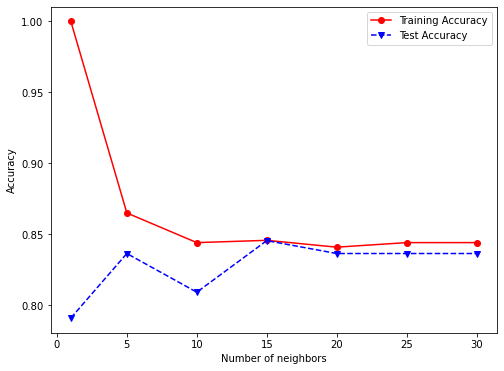

In [66]:
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(x_train, y_train)
    y_predTrain = clf.predict(x_train)
    y_predTest = clf.predict(x_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index],
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [67]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'none')

clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()

clf = LogisticRegression(penalty = 'l2')

clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Logistic Regression with no regularization
Train Accuracy:  0.8536977491961415
Test Accuracy:  0.8636363636363636

Logistic Regression with L2 regularization
Train Accuracy:  0.8520900321543409
Test Accuracy:  0.8545454545454545


In [68]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.594855305466238
Test Accuracy:  0.5818181818181818


In [69]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.8408360128617364
Test Accuracy:  0.8272727272727273


In [70]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.8392282958199357
Test Accuracy:  0.8454545454545455


In [71]:
# for the SVC classifier
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[ 0 17]
 [ 0 93]]

Classification Report
              precision    recall  f1-score   support

          No      0.000     0.000     0.000        17
         Yes      0.845     1.000     0.916        93

    accuracy                          0.845       110
   macro avg      0.423     0.500     0.458       110
weighted avg      0.715     0.845     0.775       110



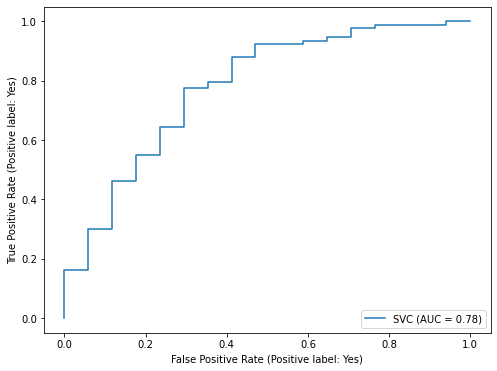

In [72]:
from sklearn.metrics import plot_roc_curve
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(x_train, y_train)
metrics.plot_roc_curve(clf, x_test, y_test);